# Question 1

In [9]:
import pandas as pd
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep="|")
print (users.columns)

# Mean age grouped by Occupation
mean_age = users.groupby('occupation')['age'].mean()

print ("Mean age:\n",mean_age)

male_female_ratio = users.groupby("occupation")["gender"].value_counts(normalize=True)*100
male_female_percent = pd.DataFrame(male_female_ratio)
male_female_percent.rename(columns={"gender":"percent"}, inplace=True)
new_male_female_percent = pd.DataFrame(male_female_percent.reset_index(level=["occupation", "gender"]))

males_ratio = new_male_female_percent[new_male_female_percent["gender"] == "M"].sort_values(by="percent",ascending=False)


print ("Male ration:\n",males_ratio)

# Min and Max age grouped by occupation
min_max_age = users.groupby('occupation').agg({'age': [ 'min', 'max']})
print ("Minimum and maximum age:\n",min_max_age)

# Mean age grouped by occupation and gender
occupation_sex_mean_age = users.groupby(['occupation','gender'])['age'].mean()
print ("Occupation mean age:\n",occupation_sex_mean_age)


# Male and Female Percent
print ("Male and female percentage:\n",new_male_female_percent)


Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')
Mean age:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64
Male ration:
        occupation gender     percent
4          doctor      M  100.000000
7        engineer      M   97.014925
37     technician      M   96.296296
29        retired      M   92.857143
27     programmer      M   90.909091
11      executive      M   90.625000
33      scientist      M   90.3225

# Question 2

In [13]:
import pandas as pd
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

# Select only the Goal column
print ("Goals:\n",euro12['Goals'])

# Team participated in the Euro2012
team_count = len(euro12['Team'].unique())
print ("Number of teams participated in the Euro2012:",team_count)

# Number of columns in the dataset
no_of_columns = len(euro12.columns)
print ("Number of columns in the dataset:",no_of_columns)

# View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']].copy()
print(discipline)

# Sort the teams by Red Cards, then to Yellow Cards
sorted_team = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=[True,True])
print (sorted_team)

# Calculate the mean Yellow Cards given per Team
mean_yellow_cards = discipline['Yellow Cards'].mean()
print ("The mean Yellow Cards given per Team:",mean_yellow_cards)

# Filter teams that scored more than 6 goals
team_with_more_than_six_goals = euro12[euro12['Goals'] > 6]['Team']
print ("Team with more than 6 goals:\n",team_with_more_than_six_goals)

# Teams that start with G
teams_start_with_G = euro12[euro12['Team'].str.startswith("G")]['Team']
print ("the teams that starts G letter:\n",teams_start_with_G)

# Select the first 7 columns
euro12_with_first_7_columns =  euro12.iloc[:, : 7]
print ("The first 7 columns\n",euro12_with_first_7_columns)

# Select all columns except the last 3
euro12_without_last_3_columns = euro12.iloc[:, : -3]
print ("All columns except the last 3\n",euro12_without_last_3_columns)

# Present only the Shooting Accuracy from England, Italy and Russia
shooting_accuracy = euro12[euro12['Team'].str.contains('England|Italy|Russia', regex = True)]['Shooting Accuracy']
print ("Shooting Accuracy from England, Italy and Russia\n",shooting_accuracy)

Goals:
 0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64
Number of teams participated in the Euro2012: 16
Number of columns in the dataset: 35
                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
1

# Question 3

In [28]:
import pandas as pd
import numpy as np

# Create random data for bedrooms, bathrooms, and price per square meter
bedrs = pd.Series(np.random.randint(1,4, size=100))
bathrs = pd.Series(np.random.randint(1,3, size=100))
price_sqr_meter = pd.Series(np.random.randint(10000,30000, size=100))

# Combine into a DataFrame and print
data = pd.concat([bedrs,bathrs,price_sqr_meter], axis=1)
data.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace = True)  
print (data)

# Concatenate the Series to create a single Series and print
bigcolumn = pd.concat([bedrs, bathrs, price_sqr_meter], axis=0).reset_index(drop=True)
print (bigcolumn)

    bedrs  bathrs  price_sqr_meter
0       1       1            27097
1       2       1            23838
2       2       2            22494
3       3       2            12765
4       1       2            20199
..    ...     ...              ...
95      3       2            29220
96      1       2            23784
97      3       1            12365
98      3       1            25285
99      2       1            23020

[100 rows x 3 columns]
0          1
1          2
2          2
3          3
4          1
       ...  
295    29220
296    23784
297    12365
298    25285
299    23020
Length: 300, dtype: int64


# Question 5

In [16]:
import pandas as pd
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

chipo_first_10 = chipo.head(10)
print ("The first 10 entries\n",chipo_first_10)

no_of_observations = len(chipo.index)
print ("The number of observations in the dataset:",no_of_observations)

no_of_columns = len(chipo.columns)
print ("The number of columns in the dataset:",no_of_columns)

print (list(chipo.columns.values.tolist()))

print (chipo.index)

max_ordered_item = chipo.groupby(['item_name'])['quantity'].count().nlargest(1)

# Most ordered item
print ("The most-ordered item",max_ordered_item.index.values)

# No of times it was ordered
print ("Number of the most-ordered item:",max_ordered_item.values)

chipo['item_price'] = chipo['item_price'].str.replace("$",'',regex=True)

datatypes = chipo.dtypes['item_price']
print (datatypes)

chipo[['item_price']] = chipo[['item_price']].apply(lambda x: x.astype(float))

datatypes = chipo.dtypes['item_price']
print (datatypes)

total_revenue = chipo['item_price'].sum()
print ("The revenue for the period in the dataset:",total_revenue)

order_count = len(chipo['order_id'].unique())
print ("orders were made in the period:",order_count)

revenue_per_order = chipo.groupby('order_id')['item_price'].sum()
print ("the average revenue amount per order:",revenue_per_order)

different_items = len(chipo['item_name'].unique())
print("Number of itmes sold:",different_items)

The first 10 entries
    order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3        

# Question 6

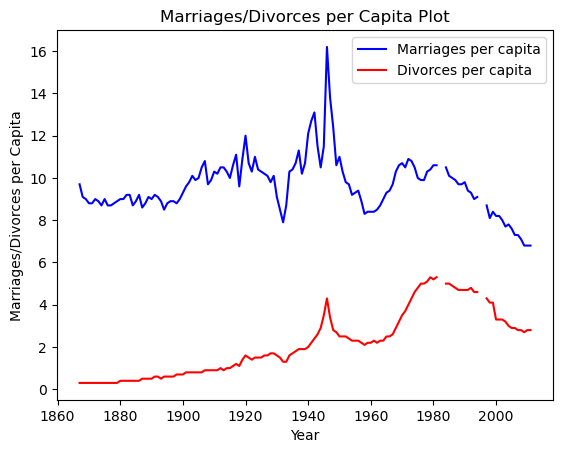

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

us_marriages_divorces = pd.read_csv("/Users/swathilal/Desktop/BDAT/Data programming/problem set 3/us-marriages-divorces-1867-2014.csv")
year = us_marriages_divorces['Year']
marriages = us_marriages_divorces['Marriages_per_1000']
divorces = us_marriages_divorces['Divorces_per_1000']

#Create a line plot for Marriages and Divorces per Capita over the years
plt.plot(year, marriages, 'b-', label='Marriages per capita')
plt.plot(year, divorces,'r-', label='Divorces per capita')

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Marriages/Divorces per Capita")
plt.title('Marriages/Divorces per Capita Plot')
plt.legend()
# Show the plot
plt.show()

# Question 7

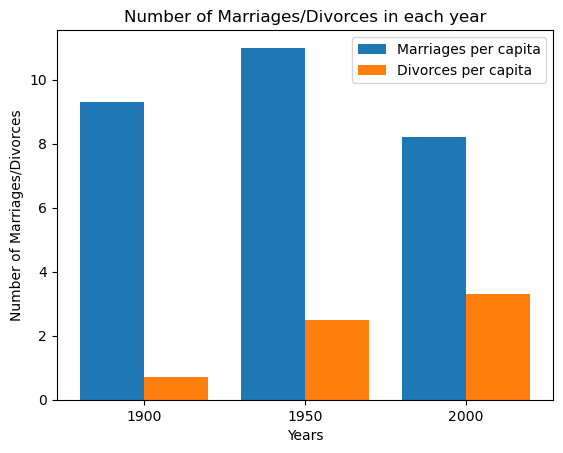

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

us_marriages_divorces = pd.read_csv("/Users/swathilal/Desktop/BDAT/Data programming/problem set 3/us-marriages-divorces-1867-2014.csv")

# Filter the data for years 1900, 1950, and 2000
us_marriages_divorces = us_marriages_divorces[
    us_marriages_divorces['Year'].apply(lambda year: year in [1900, 1950, 2000])]

# Extract marriage and divorce rates
marriage_per_capita = us_marriages_divorces['Marriages_per_1000']
divorces_per_capita = us_marriages_divorces['Divorces_per_1000']

# Extract the years for the x-axis
years = us_marriages_divorces['Year']

X_axis = np.arange(len(years))

#print (years)

# Create a grouped bar plot
plt.bar(X_axis - 0.2, marriage_per_capita, 0.4, label = 'Marriages per capita')
plt.bar(X_axis + 0.2, divorces_per_capita, 0.4, label = 'Divorces per capita')


plt.xticks(X_axis, years)
plt.xlabel("Years")
plt.ylabel("Number of Marriages/Divorces")
plt.title("Number of Marriages/Divorces in each year")
plt.legend()
plt.show()

# Question 8

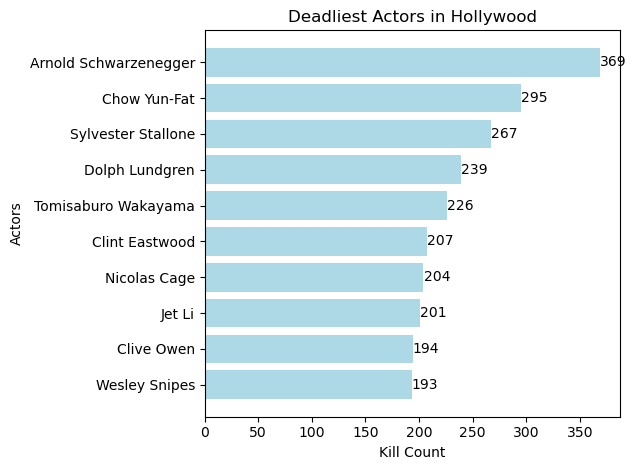

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

actors_data = pd.read_csv("/Users/swathilal/Desktop/BDAT/Data programming/problem set 3/actor_kill_counts.csv")

# Sort the data by kill count in ascending
actors_data = actors_data.sort_values(by='Count', ascending=True)  

# Extract actors' names and their kill counts
actors = actors_data['Actor']
kill_counts = actors_data['Count']

# Create a horizontal bar plot
plt.barh(actors, kill_counts, color='lightblue')
plt.xlabel("Kill Count")
plt.ylabel("Actors")
plt.title("Deadliest Actors in Hollywood")
plt.tight_layout()

# Label each bar with the kill count value
for i, count in enumerate(kill_counts):
    plt.text(count + 0.2, i, str(count), va='center')  # Label each bar with the kill count

plt.show()

# Question 9

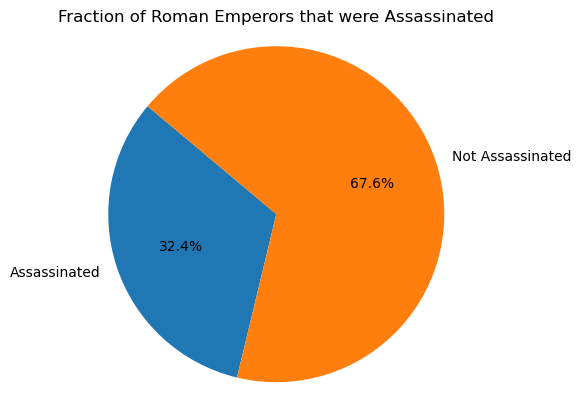

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

roman_emperors = pd.read_csv("/Users/swathilal/Desktop/BDAT/Data programming/problem set 3/roman-emperor-reigns.csv")

# Filter data for assassinated emperors
assassinated_emperors = roman_emperors[roman_emperors['Cause_of_Death'] == 'Assassinated']

# Calculating the total number of emperors and the count of assassinated emperors
total_emperors = len(roman_emperors)
assassinated_count = len(assassinated_emperors)

# Calculating the count of not assassinated emperors
not_assassinated_count = total_emperors - assassinated_count

# Labels for the pie chart
labels = ['Assassinated', 'Not Assassinated']
sizes = [assassinated_count, not_assassinated_count]

# Creating a pie chart with percentage labels and equal aspect ratio
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Fraction of Roman Emperors that were Assassinated")
plt.show()

# Question 10

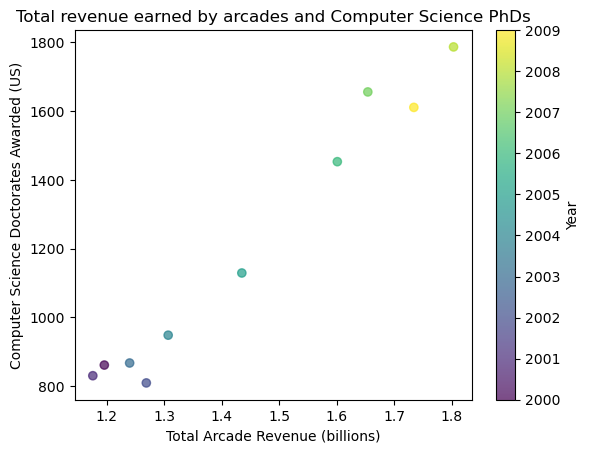

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

arcade_phd_data = pd.read_csv("/Users/swathilal/Desktop/BDAT/Data programming/problem set 3/arcade-revenue-vs-cs-doctorates.csv")

# Filter data for years 2000 to 2009
filtered_data = arcade_phd_data[(arcade_phd_data['Year'] >= 2000) & (arcade_phd_data['Year'] <= 2009)]

revenue = filtered_data['Total Arcade Revenue (billions)']
phd_count = filtered_data['Computer Science Doctorates Awarded (US)']
years = filtered_data['Year']

# Create a scatter plot
plt.scatter(revenue, phd_count, c=years, cmap='viridis', alpha=0.7)

# Add a color bar indicating the years
plt.colorbar(label='Year')

# Add labels to the x and y axes and titel to the plot
plt.xlabel("Total Arcade Revenue (billions)")
plt.ylabel("Computer Science Doctorates Awarded (US)")
plt.title("Total revenue earned by arcades and Computer Science PhDs")
plt.show()